<a href="https://colab.research.google.com/github/NicoGajardo/MachineLearning/blob/main/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


<ipython-input-55-46dbe4134328>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['origin'] = df['origin'].replace({'usa': 1, 'europe': 2, 'japan': 3})


<Axes: xlabel='horsepower', ylabel='mpg'>

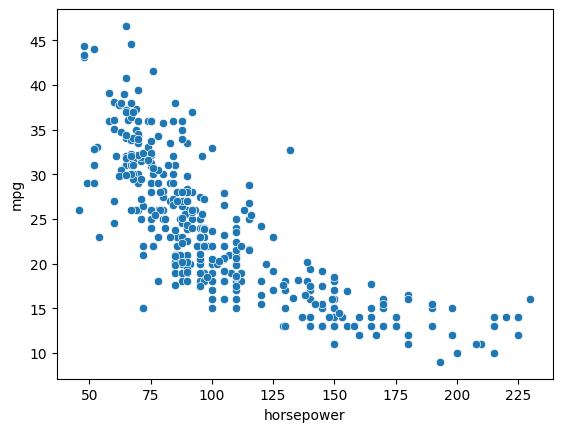

In [55]:
import seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Cargar los datos auto mpg
df = sns.load_dataset('mpg')
df = df.iloc[:, :-1]
df['origin'] = df['origin'].replace({'usa': 1, 'europe': 2, 'japan': 3})

print(df.head())

#Crear un gráfico de dispersión con los datos
seaborn.scatterplot(data=df, x='horsepower', y='mpg')

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

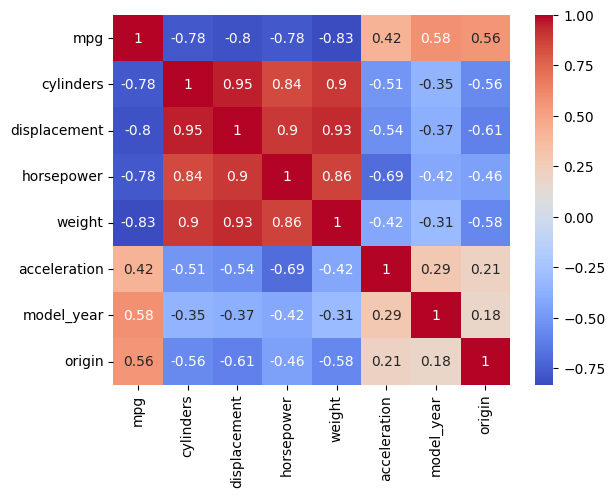

In [56]:
#entrega un gráfico de correlación a travez de un heatmap para visualizar las dependencias de los datos
import matplotlib.pyplot as plt

# Crea el gráfico de correlación
heatmap = seaborn.heatmap(df.corr(), annot=True, cmap='coolwarm')


3) (1 punto) Entrenar un modelo de regresion lineal


In [73]:
#importa un modelo de regresión lineal desde scikit learn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#eliminar las instancias que posean valor NaN
df = df.dropna()

#separa la primera columna de base
y = df.iloc[:, 0]
X = df.iloc[:, 1:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

X_test

regressor = LinearRegression()
regressor.fit(X_train, y_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


y_pred_lin = regressor.predict(X_test)
y_pred_lin

y_pred_ridge= ridge.predict(X_test)
y_pred_ridge


array([27.30961998, 26.44162521, 10.48926601, 33.27385299, 32.06400419,
       23.55892235, 33.31768518, 25.30819013, 21.0806928 , 26.18014814,
       27.69587779, 13.79676866, 25.88851881,  7.8681942 , 16.45834429,
       31.95376376, 26.08508265, 12.93805878, 25.82510657, 27.83797516,
       20.94066739, 18.03456767, 24.88216712, 27.94167372, 31.65928279,
       11.25160642, 29.46947927, 26.61718367, 23.23552333, 15.29139845,
       21.77226602, 29.64042565, 23.84818775, 28.46825241, 22.26401932,
       28.12932904, 27.9718133 , 11.24052883, 14.9728232 ,  9.83075442,
       13.97088545, 33.48965171, 29.4371856 , 13.86004805, 30.81957477,
       15.10271997, 30.92683896, 10.41364343, 17.67191775, 22.48822434,
       26.56785136, 14.85880526,  9.58944243, 24.04959615, 31.50162603,
       25.89337317, 26.58421145, 20.89094168, 30.65447803, 25.61871239,
       19.84707436, 27.55695926, 31.20673665,  9.86746284, 25.88813848,
       16.97217078,  9.96210823, 30.35946094, 21.17288287, 32.38

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [74]:
# prompt: Mostrar el resumen de desempeño del modelo de regresión lineal a travez de métricas de regresión MSE, MAE y R2

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_lin)
mae = mean_absolute_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

# Print the metrics
print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print("")
# Print the metrics
print("Ridge Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Linear Regression Metrics:
Mean Squared Error (MSE): 11.878262288865706
Mean Absolute Error (MAE): 2.672460882627317
R-squared (R2): 0.8088938602131774

Ridge Regression Metrics:
Mean Squared Error (MSE): 11.847810678875511
Mean Absolute Error (MAE): 2.6683756743664535
R-squared (R2): 0.8093837879057975


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


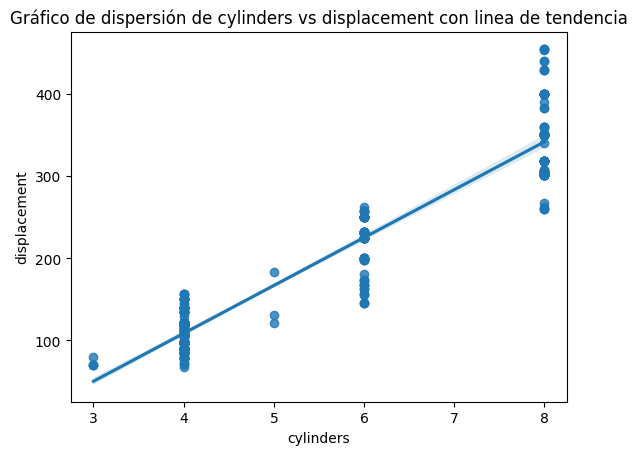

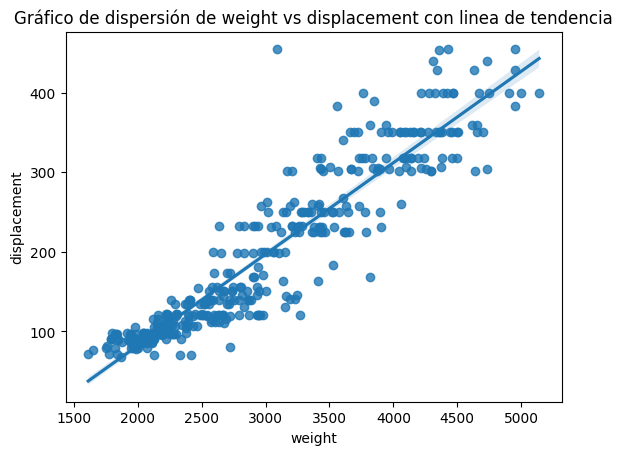

In [79]:
#Para el segundo par de variables (cylinders y displacement, y weight y displacement)
sns.regplot(x='cylinders', y='displacement', data=df)
plt.title("Gráfico de dispersión de cylinders vs displacement con linea de tendencia")
plt.show()

sns.regplot(x='weight', y='displacement', data=df)
plt.title("Gráfico de dispersión de weight vs displacement con linea de tendencia")
plt.show()


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.